In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
def data_reading_cleaning():
    '''
    data reading and cleaning
    make sure degrees-that-pay-back.csv, salaries-by-college-type.csv, salaries-by-region.csv
    are in the same folder of this script
    if you dont have those data, please download it at: https://www.kaggle.com/wsj/college-salaries
    '''
    def string_dollar_to_integer(data, column):
        '''
        change string dollar to integer dollar
        example : $75,000.00 to 75000
        data: pandas.core.frame.DataFrame
        column: valid column name in data
        '''
        assert isinstance(column, str)
        assert data.columns.contains(column)
        data[column] = data[column].str.replace("$","")
        data[column] = data[column].str.replace(",","")
        data[column] = pd.to_numeric(data[column])
    Degree_df = pd.read_csv("./degrees-that-pay-back.csv")
    College_df = pd.read_csv("./salaries-by-college-type.csv")
    Region_df = pd.read_csv("./salaries-by-region.csv")
    for df in [Degree_df, College_df, Region_df]:
        string_dollar_to_integer(df, 'Starting Median Salary')
        string_dollar_to_integer(df, 'Mid-Career Median Salary')
        string_dollar_to_integer(df, 'Mid-Career 10th Percentile Salary')
        string_dollar_to_integer(df, 'Mid-Career 25th Percentile Salary')
        string_dollar_to_integer(df, 'Mid-Career 75th Percentile Salary')
        string_dollar_to_integer(df, 'Mid-Career 90th Percentile Salary')
    return Degree_df, College_df, Region_df

In [3]:
def visulize_salaries_majors(Degree_df):
    '''
    Degree_df : pandas.core.frame.DataFrame
    plot major vs salaries sorting by starting salaries.
    '''
    Degree_df = Degree_df.sort_values("Starting Median Salary", ascending=False).reset_index(drop=True)
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14,12), sharey=True)
    ax = axs[0]
    ax.set_yticklabels(Degree_df['Undergraduate Major'], rotation='horizontal', fontsize='large')
    g = sns.barplot(y = Degree_df['Undergraduate Major'], x= Degree_df['Starting Median Salary'],ax=axs[0], palette=sns.cubehelix_palette(8, start=.5, rot=-.75))
    g = sns.barplot(y = Degree_df['Undergraduate Major'], x= Degree_df['Mid-Career Median Salary'],ax=axs[1], palette=sns.cubehelix_palette(8, start=.5, rot=-.75))
    plt.show()

In [4]:
def visulize_starting_mid_difference(Degree_df):
    '''
    Degree_df : pandas.core.frame.DataFrame
    plot percent of increase of starting salaries and mid-career salaries.
    '''
    Feature = Degree_df['Undergraduate Major']
    weightage = Degree_df['Starting Median Salary']
    total = Degree_df['Mid-Career Median Salary']
    percent = Degree_df['Percent change from Starting to Mid-Career Salary']
    mid_pos = (Degree_df['Starting Median Salary'] + Degree_df['Mid-Career Median Salary']) / 2
    weightage = np.array(weightage)
    Feature = np.array(Feature)
    total = np.array(total)
    percent = np.array(percent)
    mid_pos  = np.array(mid_pos)

    idx = weightage.argsort()
    Feature, total, percent, mid_pos, weightage = [np.take(x, idx) for x in [Feature, total, percent, mid_pos , weightage]]
    s = 1
    size=[]
    for i, cn in enumerate(weightage):
        s = s + 1        
        size.append(s)
    fig, ax = plt.subplots(figsize=(8, 16))
    ax.scatter(total,size,marker="o", color="lightBlue", s=size, linewidths=10)
    ax.scatter(weightage,size,marker="o", color="LightGreen", s=size, linewidths=10)
    ax.set_xlabel('Median Salary')
    ax.set_ylabel('Undergraduate Major')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    plt.grid()
    for i, txt in enumerate(Feature):
        ax.annotate(txt, (110000,size[i]),fontsize=12,rotation=0,color='Brown')
        ax.annotate('.', xy=(total[i], size[i]), xytext=(weightage[i], size[i]),
            arrowprops=dict(facecolor='LightGreen', shrink=0.06),
            )
    for i, pct in enumerate(percent):
         ax.annotate(pct, (mid_pos[i],size[i]),fontsize=12,rotation=0,color='Brown')

    ax.annotate('Starting median Salary', (35000,52),fontsize=14,rotation=0,color='Green')
    ax.annotate('Mid-Career median Salary', (35000,53),fontsize=14,rotation=0,color='Blue');
    ax.annotate('.', xy=(110000, 52.5), xytext=(68000, 52.5),
                arrowprops=dict(facecolor='LightGreen', shrink=0.06),)
    ax.annotate('Percent increase in the salary', (70000,53),fontsize=14,rotation=0,color='Brown');

In [5]:
def visualize_salaries_increase_detail(Degree_df):
    '''
    Degree_df : pandas.core.frame.DataFrame
    plot detail of staring, Mid-Career 10th, 25th, 50th, 75th, 90th, percentile salary. 
    '''
    Degree_df = Degree_df.sort_values(by = 'Mid-Career Median Salary', ascending = True)
    Degree_df = Degree_df.reset_index()
    fig = plt.figure(figsize=(8,12))
    matplotlib.rc('grid', alpha = .5, color = '#e3dfdf')   #color the grid lines
    matplotlib.rc('axes', edgecolor = '#67746A')           #color the graph edge

    x = Degree_df['Starting Median Salary']
    y = Degree_df.index
    labels = Degree_df['Undergraduate Major']
    plt.yticks(y, labels)

    x1 = Degree_df['Mid-Career 10th Percentile Salary']
    plt.scatter(x1, y, color='#f7e9ad', label = '10th pct. Mid Career Salary')
    x2 = Degree_df['Mid-Career 25th Percentile Salary']
    plt.scatter(x2, y, color='#ecc833', label = '25th pct. Mid Career Salary')
    x3 = Degree_df['Mid-Career Median Salary']
    plt.scatter(x3, y, color='#54d45d', label = 'Median Mid Career Salary')
    x4 = Degree_df['Mid-Career 75th Percentile Salary']
    plt.scatter(x4, y, color='#2b5bde', label = '75th pct. Mid Career Salary')
    x5 = Degree_df['Mid-Career 90th Percentile Salary']
    plt.scatter(x5, y, color='#a1b6f0', label = '90th pct. Mid Career Salary')

    plt.xlabel('US $')
    plt.ylabel('')
    plt.title('Salary Information by Major')
    plt.legend(loc='upper right', bbox_to_anchor=(1.42,.98))

    plt.grid(True) #turn grid on

    plt.show()

# Report of Question 1

In [6]:
Degree_df, College_df, Region_df = data_reading_cleaning()
Degree_df.head()

,Undergraduate Major,Starting Median Salary,Mid-Career Median Salary,Percent change from Starting to Mid-Career Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
0,Accounting,46000.0,77100.0,67.6,42200.0,56100.0,108000.0,152000.0
1,Aerospace Engineering,57700.0,101000.0,75.0,64300.0,82100.0,127000.0,161000.0
2,Agriculture,42600.0,71900.0,68.8,36300.0,52100.0,96300.0,150000.0
3,Anthropology,36800.0,61500.0,67.1,33800.0,45500.0,89300.0,138000.0
4,Architecture,41600.0,76800.0,84.6,50600.0,62200.0,97000.0,136000.0


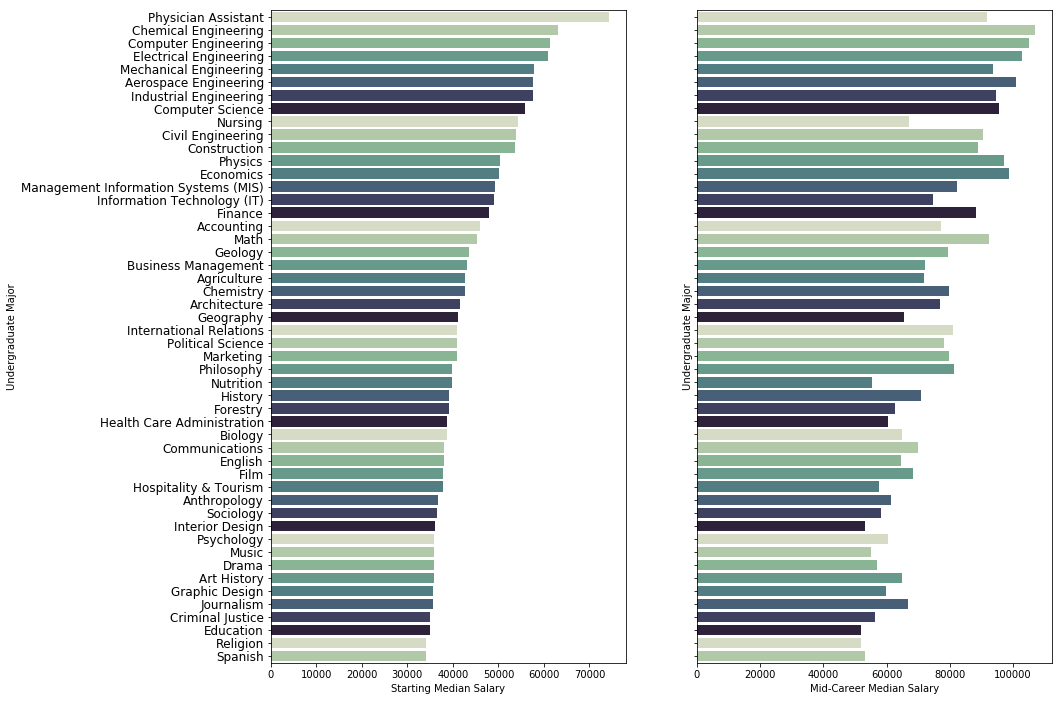

In [7]:
visulize_salaries_majors(Degree_df)

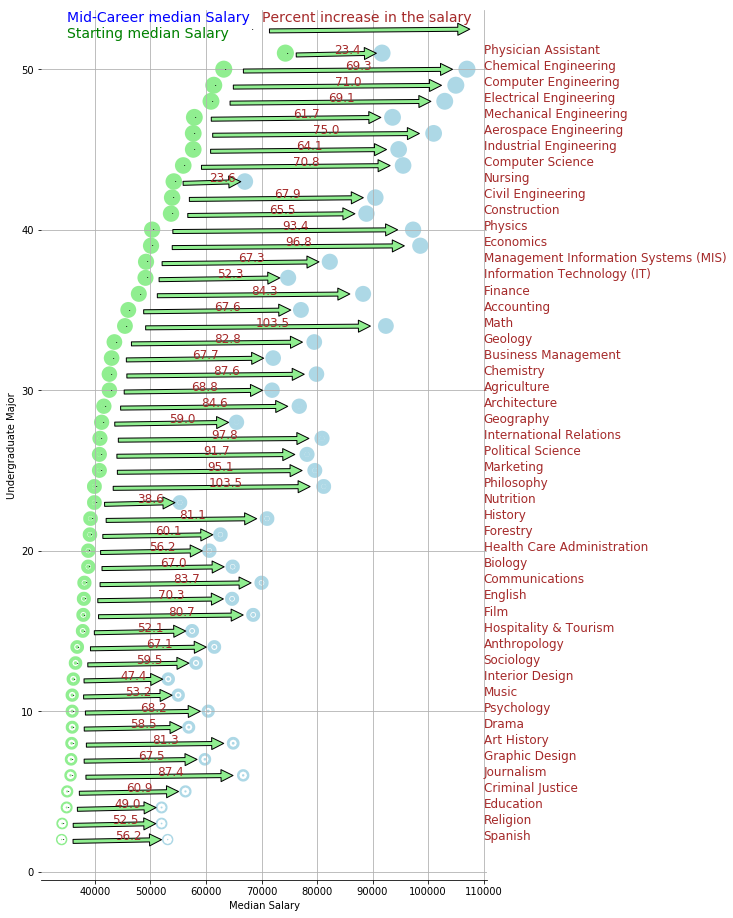

In [8]:
visulize_starting_mid_difference(Degree_df)

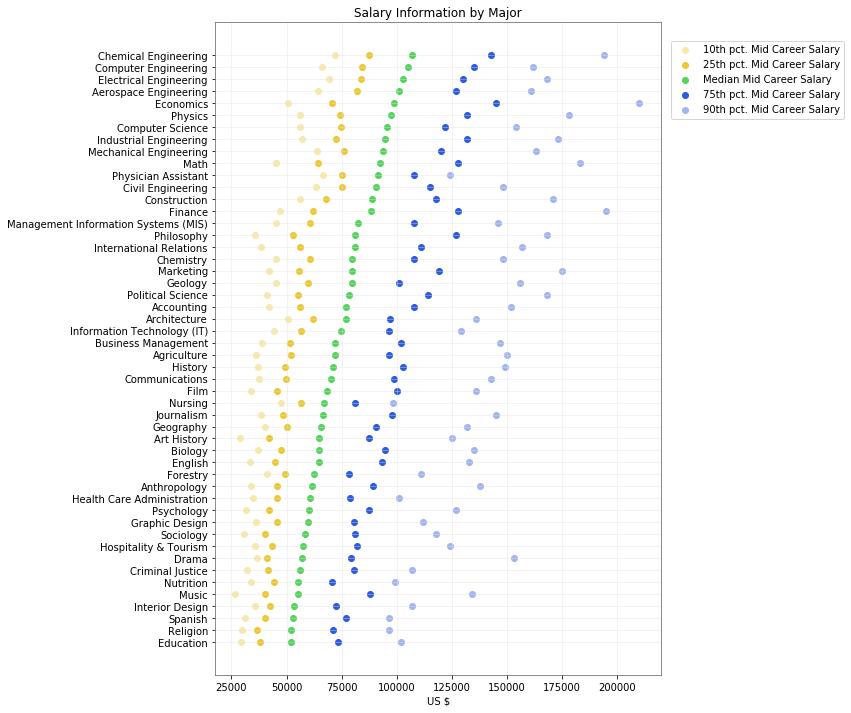

In [9]:
visualize_salaries_increase_detail(Degree_df)